<hr>
<b><font color='red'>Ejercicio 01</font></b> 

El método **Montecarlo** es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. El método se llamó así en referencia al Casino de Montecarlo (Mónaco) por ser “la capital del juego de azar”, al ser la ruleta un generador simple de números aleatorios. El nombre y el desarrollo sistemático de los métodos de Montecarlo datan aproximadamente de 1944 testee combinaciones posibles.

Vamos a calcular el valor de $\pi$, para ello, si $X$ e $Y$ son dos variables aleatorias continuas uniformes en el intervalo (-1,1) y son independientes.  
$\pi$ Vendrá dada por la probabilidad de que $X^2 + Y^2  \leq 1$, es decir:  
$$\pi = \frac{4*\text{nº puntos que caén dentro}}{\text{nº total de intentos}}$$ 
Obten tambien una gráfica como la que se muestra a continuación.

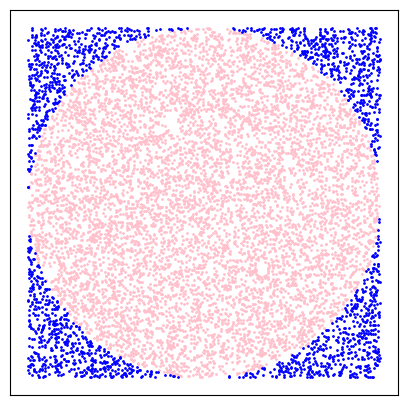

In [18]:

import matplotlib.pyplot as plt
import random

# Número de intentos
N = 10000

# Generar puntos aleatorios en el intervalo (-1, 1)
puntos = [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(N)]

# Calcular la distancia desde el origen para cada punto
distancias = [((x**2) + (y**2))**0.5 for x, y in puntos]

# Verificar si cada punto está dentro del círculo (radio=1)
dentro_circulo = [distancia <= 1 for distancia in distancias]

# Crear la gráfica
plt.figure(figsize=(5, 5))

# Pintar los puntos dentro y fuera del círculo
plt.scatter([x for x, y in puntos if dentro_circulo[puntos.index((x, y))]], 
            [y for x, y in puntos if dentro_circulo[puntos.index((x, y))]], 
            color='pink', s=1)

plt.scatter([x for x, y in puntos if not dentro_circulo[puntos.index((x, y))]], 
            [y for x, y in puntos if not dentro_circulo[puntos.index((x, y))]], 
            color='blue',s=1)

# Dibujar el círculo
circulo = plt.Circle((0, 0), 1, facecolor='none')
plt.gca().add_patch(circulo)

plt.xticks([])
plt.yticks([])

# Mostrar la gráfica
plt.show()

<img src="f6.png">  

<hr>
<b><font color='red'>Ejercicio 02</font></b> 

Crea un histograma en que se vea la distribución que saldría al sumar dos dados, tiene que verse una gráfica como la que se muestra a continuación

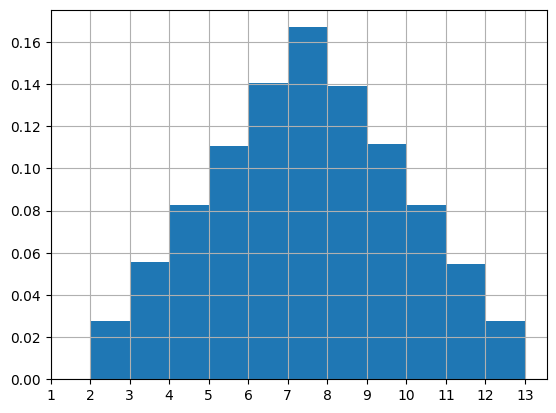

In [72]:
import matplotlib.pyplot as plt
import random

# Simular el lanzamiento de dos dados y calcular la suma
num_lanzamientos = 100000
resultados = [random.randint(1, 6) + random.randint(1, 6) for _ in range(num_lanzamientos)]

# Crear un histograma
plt.hist(resultados, bins=range(2, 14), density=True)

plt.grid(True)
plt.xticks(range(1, 14))



# Mostrar el histograma
plt.show()




<img src="f7.png">  

<hr>
<b><font color='red'>Ejercicio 03</font></b> 

Al implementar MD5, obtendremos como resultado, una cadena alfanumérica de 32 caracteres hexadecimales. Ocupando siempre 16 Bytes de memoria. 

El siguiente pin = '4aca32b706287f13903f08b7aab38f79', ha sido codificado con md5 "hashlib.md5(b'****')", para ello han utilizado dos carácteres en mayúsculas ('ABCDEF')  y dos números (0-9) , haz una función que obtenga el pin descodificado utilizando random.

¿Cuántos intentos ha relizado hasta que la ha descubierto?
Realiza el ejercicio varias veces y haz un histograma.



In [1]:
import hashlib
import random
import string

def generar_pin():
    caracteres = string.ascii_letters + string.digits  # Letras mayúsculas, minúsculas y dígitos
    pin = ''.join(random.choice(caracteres) for _ in range(4))
    return pin

def codificar_md5(texto):
    return hashlib.md5(texto.encode()).hexdigest()

def fuerza_bruta_md5(hash_objetivo):
    intentos = 0
    while True:
        pin_propuesto = generar_pin()
        hash_propuesto = codificar_md5(pin_propuesto)
        intentos += 1

        if hash_propuesto == hash_objetivo:
            return pin_propuesto, intentos

# Ejemplo de uso
pin_objetivo = '4aca32b706287f13903f08b7aab38f79'
pin_encontrado, intentos_realizados = fuerza_bruta_md5(pin_objetivo)

print(f'Pin encontrado: {pin_encontrado}')
print(f'Intentos realizados: {intentos_realizados}')




Pin encontrado: 1A2D
Intentos realizados: 4747480


<hr>
<b><font color='red'>Ejercicio 04</font></b>  

<img src="ruleta.png"> 

La ruleta europea tiene 37 números, de los cuales 18 son rojos, 18 negros y el 0, que es verde, entre las diversas apuestas existe la de de apostar todo a rojos o negros, en este caso si se gana, se ganaría lo mismo que se ha apostado.

Haz la siguiente simulación, empezando con una cantidad de 1000 euros, apostando de forma constante 50 Euros, haz que la maquina apueste siempre a los pares o a los impares, en ambos casos si sale 0 se perderia lo apostado.


In [68]:
import random

def simular_ruleta(cantidad_inicial, apuesta_constante, rondas):
    saldo = cantidad_inicial
    apuesta = apuesta_constante

    for _ in range(rondas):
        # Se elige aleatoriamente par (1) o impar (0)
        eleccion = random.choice([0, 1])

        # Se simula la tirada de la ruleta (0 a 36)
        resultado_ruleta = random.randint(0, 36)

        # Si el resultado es 0, se pierde la apuesta
        if resultado_ruleta == 0:
            saldo -= apuesta
        # Si el resultado coincide con la elección, se gana
        elif resultado_ruleta % 2 == eleccion:
            saldo += apuesta
        # Si no, se pierde la apuesta
        else:
            saldo -= apuesta

    return saldo

# Configuración inicial
cantidad_inicial = 1000
apuesta_constante = 50
rondas = 100

# Simulación de apuestas a pares
saldo_final_pares = simular_ruleta(cantidad_inicial, apuesta_constante, rondas)

# Simulación de apuestas a impares
saldo_final_impares = simular_ruleta(cantidad_inicial, apuesta_constante, rondas)

# Resultados
print(f'Saldo final apostando a pares: {saldo_final_pares} euros')
print(f'Saldo final apostando a impares: {saldo_final_impares} euros')



Saldo final apostando a pares: 1300 euros
Saldo final apostando a impares: 0 euros


<hr>
<b><font color='red'>Ejercicio 05</font></b>  

Utiliza 10 jugadores y haz el promedio de veces en lo que tardarían en arruinarse

In [76]:
import random

def simular_ruleta(cantidad_inicial, apuesta_constante):
    saldo = cantidad_inicial
    apuesta = apuesta_constante
    rondas = 0

    while saldo > 0:
        eleccion = random.choice([0, 1])
        resultado_ruleta = random.randint(0, 36)

        if resultado_ruleta == 0:
            saldo -= apuesta
        elif resultado_ruleta % 2 == eleccion:
            saldo += apuesta
        else:
            saldo -= apuesta

        rondas += 1

    return rondas

def simular_varios_jugadores(num_jugadores, cantidad_inicial, apuesta_constante):
    total_rondas = 0

    for _ in range(num_jugadores):
        rondas = simular_ruleta(cantidad_inicial, apuesta_constante)
        total_rondas += rondas

    promedio_rondas = total_rondas / num_jugadores
    return promedio_rondas

# Configuración
num_jugadores = 10
cantidad_inicial = 1000
apuesta_constante = 50

# Simulación
promedio_rondas = simular_varios_jugadores(num_jugadores, cantidad_inicial, apuesta_constante)

# Resultado
print(f'Promedio de rondas para arruinarse: {promedio_rondas} rondas')

#HE decidido hacer el codigo sin intentos porque no se aprecian menos de 100 rondas porque siempre me sale mas



Promedio de rondas para arruinarse: 661.0 rondas


<hr>
<b><font color='red'>Ejercicio 06</font></b>  

Obten la siguiente evolución respecto el número de jugadores:

    print("%6d" % njugadores,"%.1f" % a.mean(),"%.0f"%a.std())
        10 636.8 624
        20 603.0 799
        50 799.2 875
       100 558.1 500
       200 921.6 1236
       500 744.2 936
      1000 726.1 1021
      5000 734.3 967
     10000 734.5 1021


In [77]:
import random
import numpy as np

def simular_ruleta(cantidad_inicial, apuesta_constante):
    saldo = cantidad_inicial
    apuesta = apuesta_constante
    rondas = 0

    while saldo > 0:
        eleccion = random.choice([0, 1])
        resultado_ruleta = random.randint(0, 36)

        if resultado_ruleta == 0:
            saldo -= apuesta
        elif resultado_ruleta % 2 == eleccion:
            saldo += apuesta
        else:
            saldo -= apuesta

        rondas += 1

    return rondas

def simular_varios_jugadores(num_jugadores, cantidad_inicial, apuesta_constante):
    rondas_por_jugador = []

    for _ in range(num_jugadores):
        rondas = simular_ruleta(cantidad_inicial, apuesta_constante)
        rondas_por_jugador.append(rondas)

    return rondas_por_jugador

# Configuración
num_jugadores_lista = [10, 20, 50, 100, 200, 500, 1000, 5000, 10000]
cantidad_inicial = 1000
apuesta_constante = 50

# Resultados
print("%6s %12s %12s" % ('Jugadores', 'Promedio', 'Desviación Estándar'))
for num_jugadores in num_jugadores_lista:
    rondas_por_jugador = simular_varios_jugadores(num_jugadores, cantidad_inicial, apuesta_constante)
    promedio_rondas = np.mean(rondas_por_jugador)
    desviacion_estandar_rondas = np.std(rondas_por_jugador)
    
    print("%6d %12.1f %12.0f" % (num_jugadores, promedio_rondas, desviacion_estandar_rondas))


Jugadores     Promedio Desviación Estándar
    10        789.2          770
    20        482.9          395
    50        605.4          726
   100        592.4          692
   200        727.5          840
   500        728.3         1143
  1000        717.1          960
  5000        751.0         1046
 10000        740.0         1018


<hr>
<b><font color='red'>Ejercicio 07</font></b>  

Empezamos con el problema del viajante, (Travelling Salesman Problem) responde a la siguiente pregunta: dada una lista de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y al finalizar regresa a la ciudad origen? Este es un problema NP-Hard dentro en la optimización combinatoria, muy importante en investigación operativa y en ciencias de la computación. 
En el siguiente problema partiendo de Madrid tenemos que pasar por las siguientes ciudades

In [1]:
import random
import numpy as np
from ipyleaflet import Map, Polyline, Marker

def calcular_distancia(ciudad1, ciudad2):
    return np.linalg.norm(ciudad1 - ciudad2)

def calcular_longitud_ruta(ruta, ciudades):
    longitud = 0
    for i in range(len(ruta) - 1):
        longitud += calcular_distancia(ciudades[ruta[i]], ciudades[ruta[i + 1]])
    longitud += calcular_distancia(ciudades[ruta[-1]], ciudades[ruta[0]])  # Cerrar el ciclo
    return longitud

def busqueda_aleatoria(ciudades, num_iteraciones):
    mejor_ruta = None
    mejor_longitud = float('inf')

    for _ in range(num_iteraciones):
        ruta_actual = list(range(len(ciudades)))
        random.shuffle(ruta_actual)
        longitud_actual = calcular_longitud_ruta(ruta_actual, ciudades)

        if longitud_actual < mejor_longitud:
            mejor_ruta = ruta_actual
            mejor_longitud = longitud_actual

    return mejor_ruta

# Coordenadas de las ciudades
ciudades = np.array([
    [40.4950873744, -3.71704619215],
    [41.6207742504, -2.58874304739],
    [38.4786378049, -0.568699068376],
    [42.0439686698, 1.04798206104],
    [36.5538729195, -5.7604183752],
    [40.8049892162, -6.06541224773],
    [42.435764706, -8.46106294738],
    [38.0165122783, -3.44169215171],
    [41.6203648019, -1.06449678144],
    [42.1280117119, 2.6735559327],
    [43.292357861, -5.99350932547]
])

# Ejecutar la búsqueda aleatoria
ruta_optima_indices = busqueda_aleatoria(ciudades, num_iteraciones=10000)
ruta_optima = ciudades[ruta_optima_indices]

# Imprimir la ruta
print("Ruta más corta:")
for ciudad in ruta_optima:
    print(ciudad)

# Dibujar el mapa
m = Map(center=(ciudades[0][0], ciudades[0][1]), zoom=6)

# Añadir polílinea para representar la ruta
polyline = Polyline(locations=ruta_optima.tolist(), color="blue", fill=False)
m.add_layer(polyline)

# Añadir marcadores para cada ciudad
for ciudad in ciudades:
    marker = Marker(location=(ciudad[0], ciudad[1]))
    m.add_layer(marker)

# Mostrar el mapa
m


Ruta más corta:
[38.4786378  -0.56869907]
[41.6203648  -1.06449678]
[41.62077425 -2.58874305]
[40.49508737 -3.71704619]
[38.01651228 -3.44169215]
[36.55387292 -5.76041838]
[40.80498922 -6.06541225]
[42.43576471 -8.46106295]
[43.29235786 -5.99350933]
[42.04396867  1.04798206]
[42.12801171  2.67355593]


Map(center=[40.4950873744, -3.71704619215], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_i…

Crea una función que obtenga el recorrido realizado, testeala con el orden actual de ciudades 

    sol : d = 435.6697061255633

In [2]:
import random
import numpy as np

def calcular_distancia(ciudad1, ciudad2):
    return np.linalg.norm(ciudad1 - ciudad2)

def calcular_longitud_ruta(ruta, ciudades):
    longitud = 0
    for i in range(len(ruta) - 1):
        longitud += calcular_distancia(ciudades[ruta[i]], ciudades[ruta[i + 1]])
    longitud += calcular_distancia(ciudades[ruta[-1]], ciudades[ruta[0]])  # Cerrar el ciclo
    return longitud

def busqueda_aleatoria(ciudades, num_iteraciones):
    mejor_ruta = None
    mejor_longitud = float('inf')

    for _ in range(num_iteraciones):
        ruta_actual = list(range(len(ciudades)))
        random.shuffle(ruta_actual)
        longitud_actual = calcular_longitud_ruta(ruta_actual, ciudades)

        if longitud_actual < mejor_longitud:
            mejor_ruta = ruta_actual
            mejor_longitud = longitud_actual

    return mejor_ruta, mejor_longitud

def obtener_recorrido(ciudades):
    ruta_optima_indices, longitud_optima = busqueda_aleatoria(ciudades, num_iteraciones=10000)
    ruta_optima = ciudades[ruta_optima_indices]
    return ruta_optima, longitud_optima

# Coordenadas de las ciudades
ciudades = np.array([
    [40.4950873744, -3.71704619215],
    [41.6207742504, -2.58874304739],
    [38.4786378049, -0.568699068376],
    [42.0439686698, 1.04798206104],
    [36.5538729195, -5.7604183752],
    [40.8049892162, -6.06541224773],
    [42.435764706, -8.46106294738],
    [38.0165122783, -3.44169215171],
    [41.6203648019, -1.06449678144],
    [42.1280117119, 2.6735559327],
    [43.292357861, -5.99350932547]
])

# Obtener el recorrido y longitud
recorrido, longitud_recorrido = obtener_recorrido(ciudades)

# Imprimir el recorrido y longitud
print("Recorrido:")
print(recorrido)
print("\nLongitud del recorrido:", longitud_recorrido)


Recorrido:
[[41.62077425 -2.58874305]
 [42.04396867  1.04798206]
 [42.12801171  2.67355593]
 [41.6203648  -1.06449678]
 [38.4786378  -0.56869907]
 [36.55387292 -5.76041838]
 [38.01651228 -3.44169215]
 [40.49508737 -3.71704619]
 [42.43576471 -8.46106295]
 [43.29235786 -5.99350933]
 [40.80498922 -6.06541225]]

Longitud del recorrido: 36.811455312625526


Haz un algoritmo que utilice el **método montecarlo**, para este problema haz que desde desde la ciudad[0] se minimice la distancia recorrida, utilizalo con almenos 1000000 permutaciones aleatorias para mejorar el recorrido.

In [3]:
import random
import numpy as np
from ipyleaflet import Map, Polyline, Marker

def calcular_distancia(ciudad1, ciudad2):
    return np.linalg.norm(ciudad1 - ciudad2)

def calcular_longitud_ruta(ruta, ciudades):
    longitud = 0
    for i in range(len(ruta) - 1):
        longitud += calcular_distancia(ciudades[ruta[i]], ciudades[ruta[i + 1]])
    longitud += calcular_distancia(ciudades[ruta[-1]], ciudades[ruta[0]])  # Cerrar el ciclo
    return longitud

def montecarlo(ciudades, num_iteraciones):
    mejor_ruta = list(range(len(ciudades)))
    mejor_longitud = calcular_longitud_ruta(mejor_ruta, ciudades)

    for _ in range(num_iteraciones):
        ruta_actual = list(range(len(ciudades)))
        ciudad_actual = ruta_actual[0]
        random.shuffle(ruta_actual[1:])
        ruta_actual[1:] = sorted(ruta_actual[1:], key=lambda x: calcular_distancia(ciudades[ciudad_actual], ciudades[x]))
        ruta_actual.append(ruta_actual[0])  # Cerrar el ciclo

        longitud_actual = calcular_longitud_ruta(ruta_actual, ciudades)

        if longitud_actual < mejor_longitud:
            mejor_ruta = ruta_actual
            mejor_longitud = longitud_actual

    return mejor_ruta, mejor_longitud

def dibujar_ruta_en_mapa(ciudades, ruta, color="blue"):
    m = Map(center=(ciudades[0][0], ciudades[0][1]), zoom=6)

    # Añadir polílinea para representar la ruta
    polyline = Polyline(locations=ciudades[ruta].tolist(), color=color, fill=False)
    m.add_layer(polyline)

    # Añadir marcadores para cada ciudad
    for ciudad in ciudades:
        marker = Marker(location=(ciudad[0], ciudad[1]))
        m.add_layer(marker)

    return m

# Coordenadas de las ciudades
ciudades = np.array([
    [40.4950873744, -3.71704619215],
    [41.6207742504, -2.58874304739],
    [38.4786378049, -0.568699068376],
    [42.0439686698, 1.04798206104],
    [36.5538729195, -5.7604183752],
    [40.8049892162, -6.06541224773],
    [42.435764706, -8.46106294738],
    [38.0165122783, -3.44169215171],
    [41.6203648019, -1.06449678144],
    [42.1280117119, 2.6735559327],
    [43.292357861, -5.99350932547]
])

# Ejecutar el algoritmo de Monte Carlo
ruta_optima, longitud_optima = montecarlo(ciudades, num_iteraciones=1000000)

# Imprimir la ruta y longitud
print("Ruta más corta:")
print(ruta_optima)
print("\nLongitud del recorrido:", longitud_optima)

# Dibujar la ruta en el mapa
mapa_ruta_optima = dibujar_ruta_en_mapa(ciudades, ruta_optima)
mapa_ruta_optima



Ruta más corta:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Longitud del recorrido: 52.27892582702589


Map(center=[40.4950873744, -3.71704619215], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_i…

Utiliza itertools para generar todas las permutaciones y obtener la solución

<img src="permutations_ciudades.png">  

In [ ]:
import itertools
import numpy as np
from ipyleaflet import Map, Polyline, Marker

def calcular_distancia(ciudad1, ciudad2):
    return np.linalg.norm(ciudad1 - ciudad2)

def calcular_longitud_ruta(ruta, ciudades):
    longitud = 0
    for i in range(len(ruta) - 1):
        longitud += calcular_distancia(ciudades[ruta[i]], ciudades[ruta[i + 1]])
    longitud += calcular_distancia(ciudades[ruta[-1]], ciudades[ruta[0]])  # Cerrar el ciclo
    return longitud

def generar_todas_las_permutaciones(ciudades):
    # Generar todas las permutaciones posibles de las ciudades
    todas_permutaciones = list(itertools.permutations(range(len(ciudades))))

    mejor_ruta = None
    mejor_longitud = float('inf')

    for ruta_actual in todas_permutaciones:
        longitud_actual = calcular_longitud_ruta(ruta_actual, ciudades)

        if longitud_actual < mejor_longitud:
            mejor_ruta = ruta_actual
            mejor_longitud = longitud_actual

    return mejor_ruta, mejor_longitud

def dibujar_ruta_en_mapa(ciudades, ruta, color="blue"):
    m = Map(center=(ciudades[0][0], ciudades[0][1]), zoom=6)

    # Añadir polílinea para representar la ruta
    polyline = Polyline(locations=ciudades[ruta].tolist(), color=color, fill=False)
    m.add_layer(polyline)

    # Añadir marcadores para cada ciudad
    for ciudad in ciudades:
        marker = Marker(location=(ciudad[0], ciudad[1]))
        m.add_layer(marker)

    return m

# Coordenadas de las ciudades
ciudades = np.array([
    [40.4950873744, -3.71704619215],
    [41.6207742504, -2.58874304739],
    [38.4786378049, -0.568699068376],
    [42.0439686698, 1.04798206104],
    [36.5538729195, -5.7604183752],
    [40.8049892162, -6.06541224773],
    [42.435764706, -8.46106294738],
    [38.0165122783, -3.44169215171],
    [41.6203648019, -1.06449678144],
    [42.1280117119, 2.6735559327],
    [43.292357861, -5.99350932547]
])

# Generar todas las permutaciones y obtener la solución óptima
ruta_optima, longitud_optima = generar_todas_las_permutaciones(ciudades)

# Imprimir la ruta y longitud
print("Ruta más corta:")
print(ruta_optima)
print("\nLongitud del recorrido:", longitud_optima)

# Dibujar la ruta en el mapa
mapa_ruta_optima = dibujar_ruta_en_mapa(ciudades, ruta_optima)
mapa_ruta_optima
